Importing the libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv('data.csv')

Dropping the column Indicator because it is duplicate column

In [26]:
df_cleaned = df.drop(columns=["Indicator"])

We are dropping rows containg CTS_Name=CO2 Emissions Multipliers and CO2 Emissions Intensities

In [27]:
df_cleaned = df_cleaned[df_cleaned["CTS_Name"] != 'CO2 Emissions Multipliers']
df_cleaned = df_cleaned[df_cleaned["CTS_Name"] != 'CO2 Emissions Intensities']

Checking for null values

In [28]:
df_cleaned.isnull()

,ObjectId,Country,ISO2,ISO3,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Industry,...,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8890,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8903,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8907,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Creating heatmap for null values where yellow color is showing null values

<Axes: >

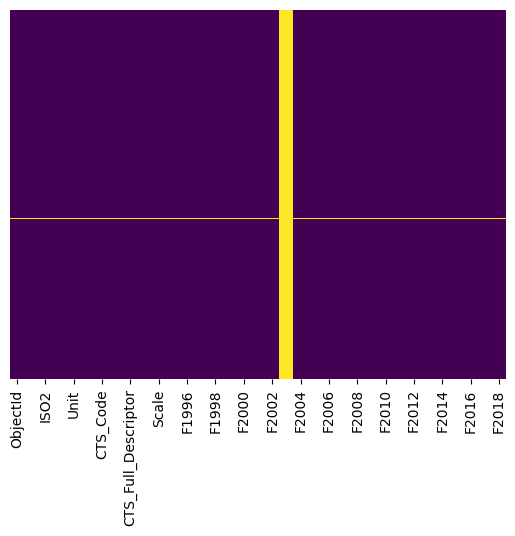

In [29]:
sns.heatmap(df_cleaned.isnull(),yticklabels = False,cbar =False,cmap = 'viridis')

Dropping 2003 column because it has only null values

In [30]:
df_cleaned.drop('F2003',axis=1,inplace = True)

Now checking for null values from graph again

<Axes: >

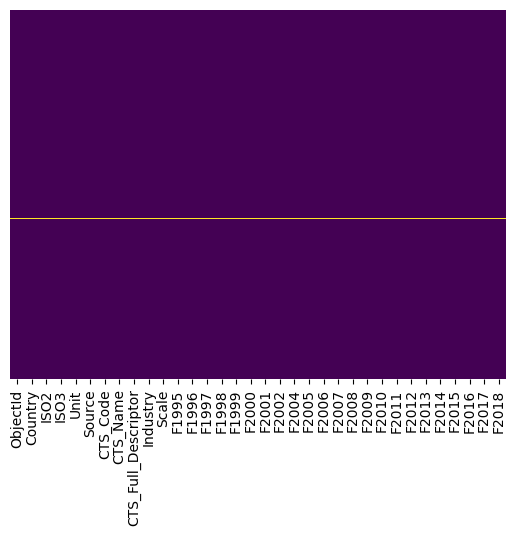

In [31]:
sns.heatmap(df_cleaned.isnull(),yticklabels = False,cbar =False,cmap = 'viridis')

Now we will fill remaining null values with zero

In [32]:
columns_to_fill = ['F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 
                   'F2001', 'F2002', 'F2004', 'F2005', 'F2006', 'F2007', 
                   'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 
                   'F2014', 'F2015', 'F2016', 'F2017', 'F2018']

df_cleaned[columns_to_fill] = df_cleaned[columns_to_fill].fillna(0)
df_cleaned = df_cleaned.dropna(subset=['Scale'])

Now heatmap after removing or filling all null values

<Axes: >

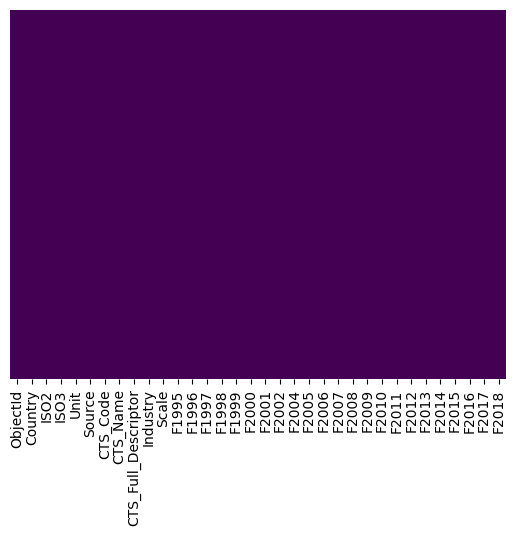

In [33]:
sns.heatmap(df_cleaned.isnull(),yticklabels = False,cbar =False,cmap = 'viridis')

Filling all negative values with zero because co2 emission can't be negative

In [34]:
columns_to_fix = ['F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 
                  'F2001', 'F2002', 'F2004', 'F2005', 'F2006', 'F2007', 
                  'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 
                  'F2014', 'F2015', 'F2016', 'F2017', 'F2018']

for col in columns_to_fix:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: 0 if x < 0 else x)    

Now we are going to plot our data for proper visualization

Below code for plotting name of countries according to their CO2 emission

                   Country  Total_F2012
30   China, P.R.: Mainland     8377.778
61           United States     3993.117
27                   India     1663.765
50      Russian Federation     1477.653
52                   Japan     1133.407
..                     ...          ...
26              Costa Rica        4.756
55                   Malta        3.569
13                Cambodia        3.507
49                 Iceland        2.675
28  Lao People's Dem. Rep.        2.608

[66 rows x 2 columns]


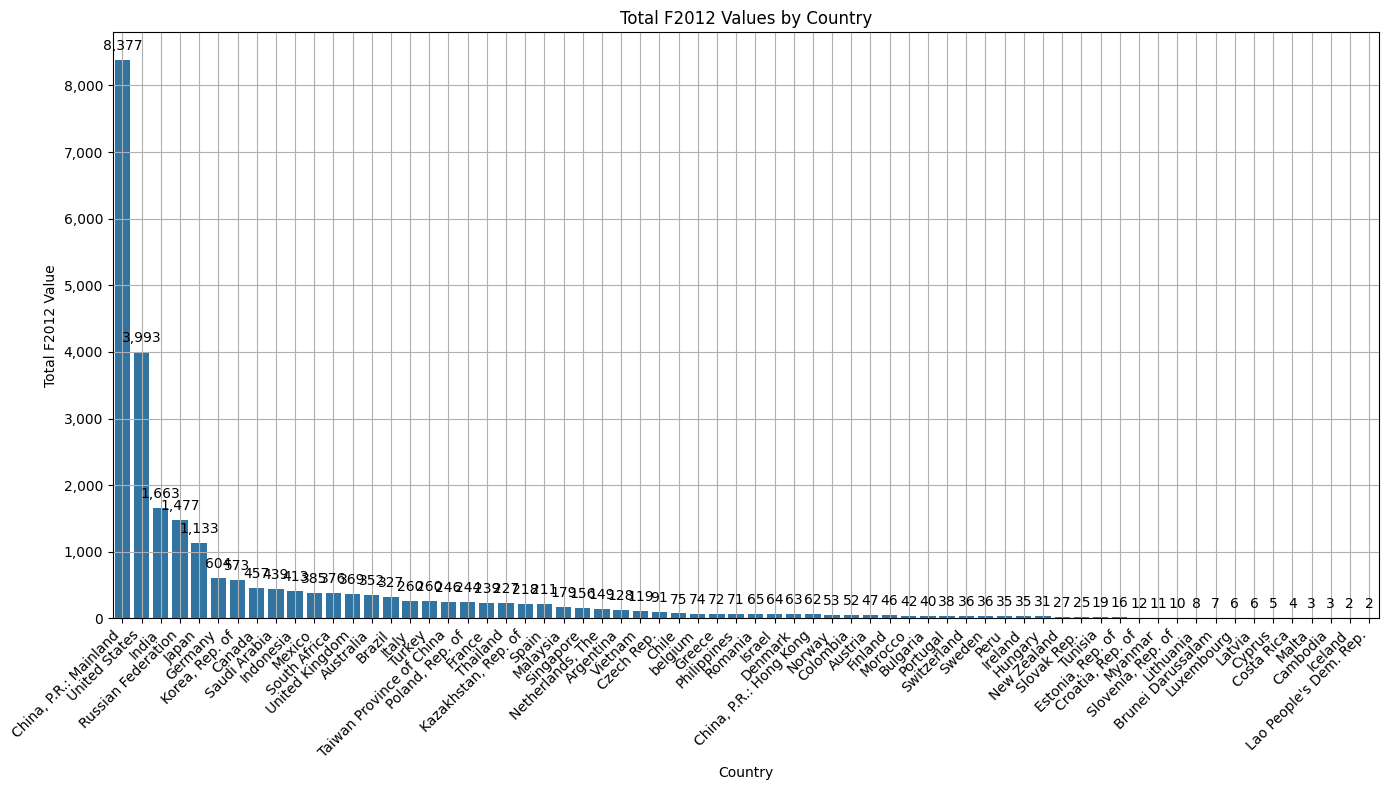

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter


unique_countries = df_cleaned['Country'].unique()

summed_values = []


for country in unique_countries:
    
    filtered_df = df_cleaned[df_cleaned['Country'] == country]
    year2012 = filtered_df['F2012'].sum()
    
    
    summed_values.append({'Country': country, 'Total_F2012': year2012})


summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_F2012', ascending=False)

print(summed_values_df)


plt.figure(figsize=(14, 8))  
bar_plot = sns.barplot(x='Country', y='Total_F2012', data=summed_values_df)
plt.title('Total F2012 Values by Country')
plt.xlabel('Country')
plt.ylabel('Total F2012 Value')


plt.xticks(rotation=45, ha='right')
plt.grid()


def format_y_values(value, tick_number):
    return f'{int(value):,}'  

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))


for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()  
plt.show() 

Now same plotting but for only top 10 countries

                  Country  Total_F2012
30  China, P.R.: Mainland     8377.778
61          United States     3993.117
27                  India     1663.765
50     Russian Federation     1477.653
52                  Japan     1133.407
4                 Germany      604.717
7          Korea, Rep. of      573.783
64                 Canada      457.489
51           Saudi Arabia      439.255
62              Indonesia      413.958


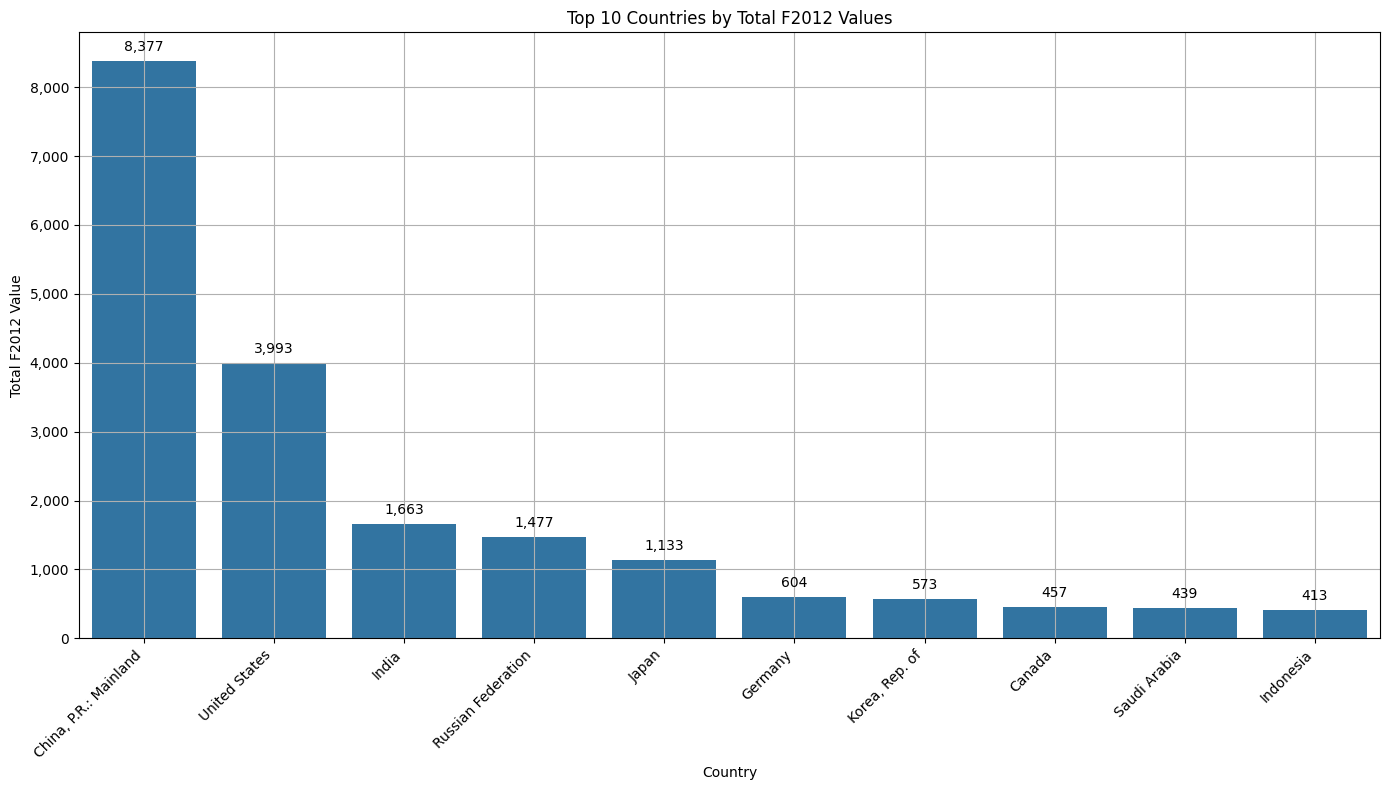

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter


unique_countries = df_cleaned['Country'].unique()

summed_values = []


for country in unique_countries:
    filtered_df = df_cleaned[df_cleaned['Country'] == country]
    year2012 = filtered_df['F2012'].sum()
    
    
    summed_values.append({'Country': country, 'Total_F2012': year2012})


summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_F2012', ascending=False)


top_10_countries_df = summed_values_df.head(10)
print(top_10_countries_df)


plt.figure(figsize=(14, 8)) 
bar_plot = sns.barplot(x='Country', y='Total_F2012', data=top_10_countries_df)
plt.title('Top 10 Countries by Total F2012 Values')
plt.xlabel('Country')
plt.ylabel('Total F2012 Value')


plt.xticks(rotation=45, ha='right')
plt.grid()


def format_y_values(value, tick_number):
    return f'{int(value):,}'  


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))


for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()  
plt.show()


                  Country  Total_F2012  Total_F2013
30  China, P.R.: Mainland     8377.778     8749.846
61          United States     3993.117     4076.715
27                  India     1663.765     1734.726
50     Russian Federation     1477.653     1429.349
52                  Japan     1133.407     1142.536
4                 Germany      604.717      613.799
7          Korea, Rep. of      573.783      575.238
64                 Canada      457.489      464.501
51           Saudi Arabia      439.255      435.219
62              Indonesia      413.958      373.863


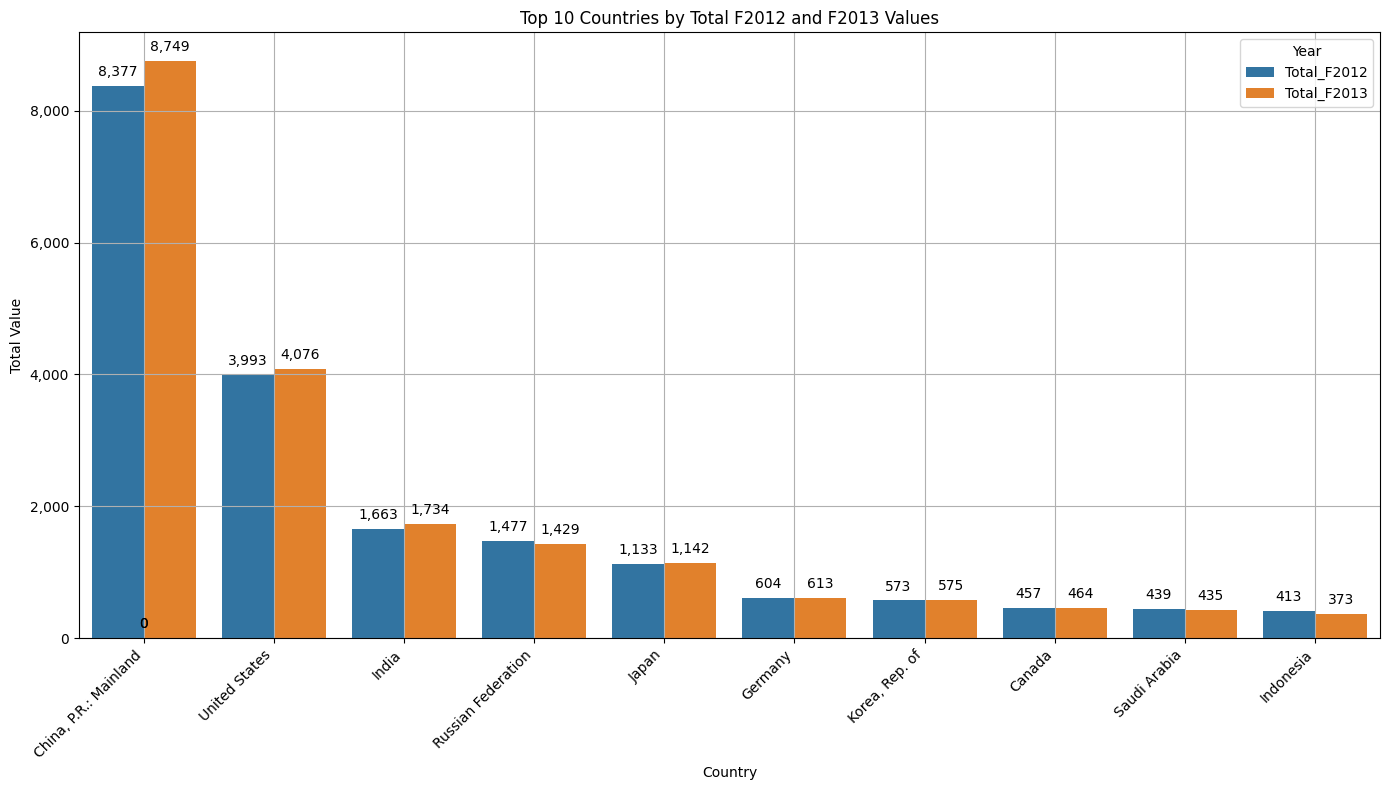

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter


unique_countries = df_cleaned['Country'].unique()
summed_values = []


for country in unique_countries:
    filtered_df = df_cleaned[df_cleaned['Country'] == country]
    
    year2012 = filtered_df['F2012'].sum()
    year2013 = filtered_df['F2013'].sum()
    
    summed_values.append({'Country': country, 'Total_F2012': year2012, 'Total_F2013': year2013})

summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_F2012', ascending=False)

top_10_countries_df = summed_values_df.head(10)

print(top_10_countries_df)

melted_df = top_10_countries_df.melt(id_vars='Country', value_vars=['Total_F2012', 'Total_F2013'],
                                       var_name='Year', value_name='Total_Value')

plt.figure(figsize=(14, 8)) 
bar_plot = sns.barplot(x='Country', y='Total_Value', hue='Year', data=melted_df)

plt.title('Top 10 Countries by Total F2012 and F2013 Values')
plt.xlabel('Country')
plt.ylabel('Total Value')

plt.xticks(rotation=45, ha='right')
plt.grid()

def format_y_values(value, tick_number):
    return f'{int(value):,}' 

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout() 
plt.show()


Top 10 Countries in CO2 emission from 1995 to 2018

                  Country     Total_Sum
0               Argentina  1.100000e+11
30  China, P.R.: Mainland  1.334550e+05
61          United States  9.822315e+04
50     Russian Federation  3.136746e+04
27                  India  2.895344e+04
52                  Japan  2.390378e+04
4                 Germany  1.419351e+04
7          Korea, Rep. of  1.136345e+04
64                 Canada  1.008995e+04
45         United Kingdom  8.580772e+03


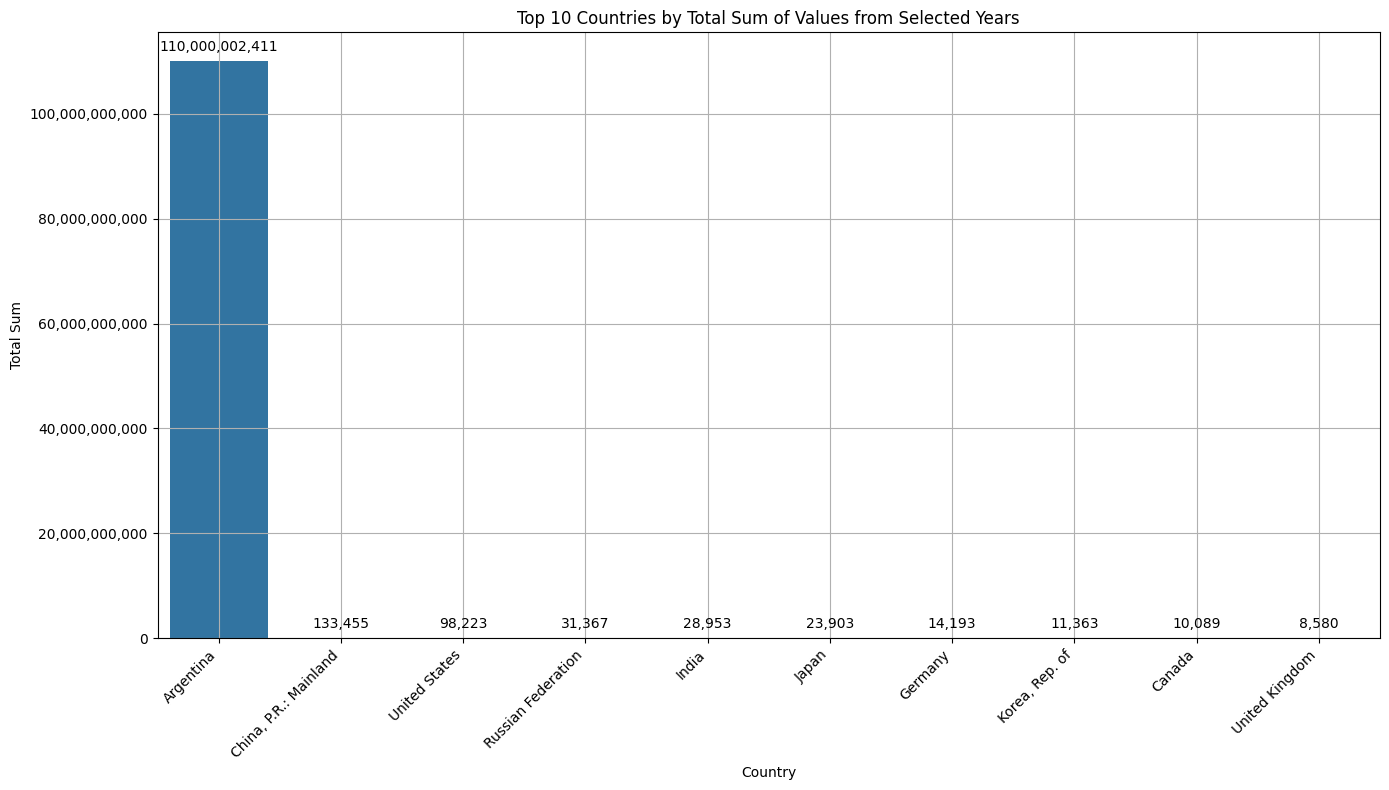

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter


columns_to_sum = ['F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 
                  'F2001', 'F2002', 'F2004', 'F2005', 'F2006', 'F2007', 
                  'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 
                  'F2014', 'F2015', 'F2016', 'F2017', 'F2018']

unique_countries = df_cleaned['Country'].unique()

summed_values = []


for country in unique_countries:
    
    filtered_df = df_cleaned[df_cleaned['Country'] == country]
    
    total_sum = filtered_df[columns_to_sum].sum().sum()  
    summed_values.append({'Country': country, 'Total_Sum': total_sum})

summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_Sum', ascending=False)

top_10_countries_df = summed_values_df.head(10)


print(top_10_countries_df)

plt.figure(figsize=(14, 8))  
bar_plot = sns.barplot(x='Country', y='Total_Sum', data=top_10_countries_df)

plt.title('Top 10 Countries by Total Sum of Values from Selected Years')
plt.xlabel('Country')
plt.ylabel('Total Sum')

plt.xticks(rotation=45, ha='right')
plt.grid()

def format_y_values(value, tick_number):
    return f'{int(value):,}'  


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()  
plt.show()


                  Country  Total_Sum
61          United States  30669.619
30  China, P.R.: Mainland  18973.707
50     Russian Federation   9247.966
52                  Japan   7027.677
27                  India   5062.063
4                 Germany   4473.167
7          Korea, Rep. of   2935.384
64                 Canada   2788.531
45         United Kingdom   2755.029
16                  Italy   1985.005


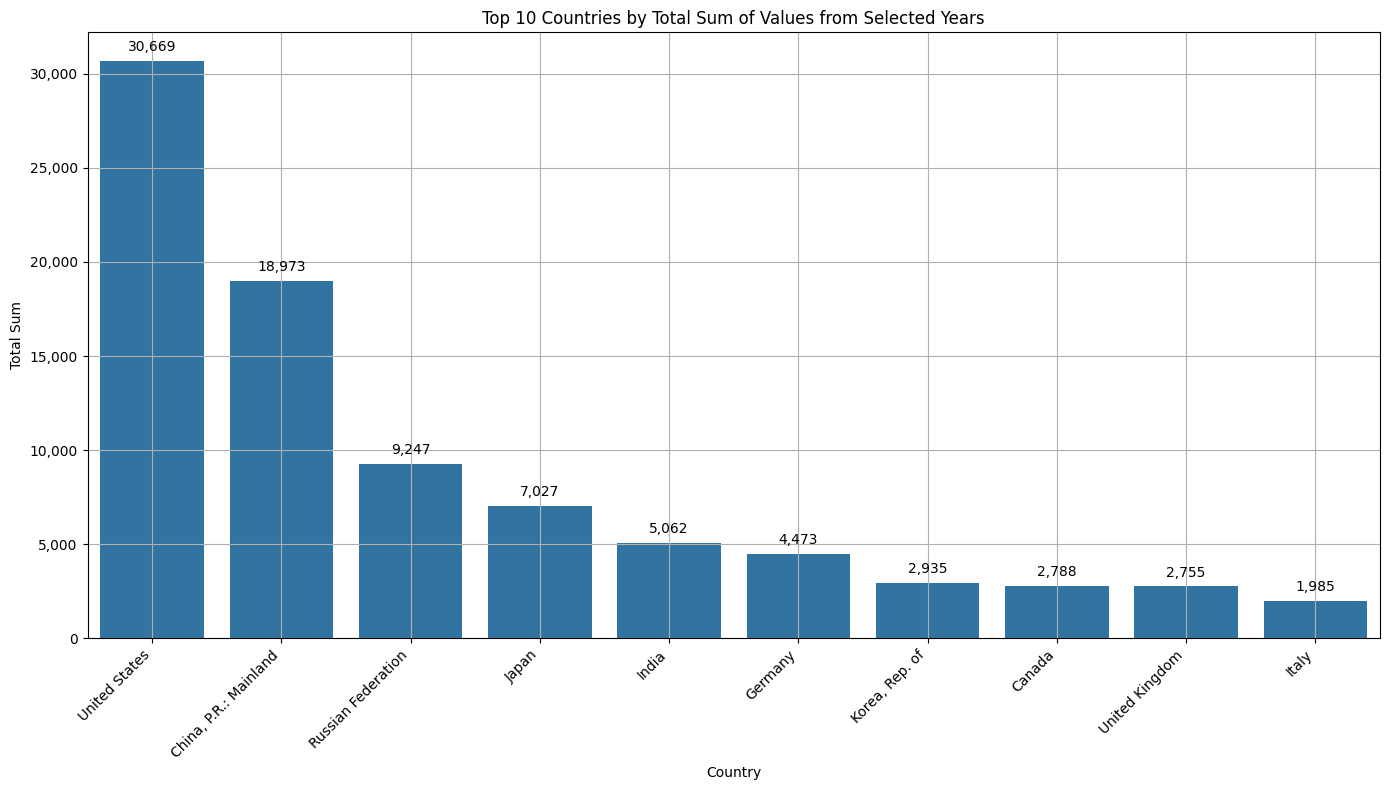

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

columns_to_sum = ['F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 
                  'F2001']

unique_countries = df_cleaned['Country'].unique()

summed_values = []

for country in unique_countries:

    filtered_df = df_cleaned[df_cleaned['Country'] == country]
    
    total_sum = filtered_df[columns_to_sum].sum().sum()  
    summed_values.append({'Country': country, 'Total_Sum': total_sum})


summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_Sum', ascending=False)

top_10_countries_df = summed_values_df.head(10)

print(top_10_countries_df)

plt.figure(figsize=(14, 8)) 
bar_plot = sns.barplot(x='Country', y='Total_Sum', data=top_10_countries_df)

plt.title('Top 10 Countries by Total Sum of Values from Selected Years')
plt.xlabel('Country')
plt.ylabel('Total Sum')

plt.xticks(rotation=45, ha='right')
plt.grid()

def format_y_values(value, tick_number):
    return f'{int(value):,}' 


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()  
plt.show()


Industries producing CO2 in year 2012 in decreasing order

                                             Industry  Total_F2012
40  Electricity, gas, steam and air conditioning s...    11425.652
14                                       Basic metals     3034.107
4                 Other non-metallic mineral products     1231.321
11         Land transport and transport via pipelines     1005.299
44                Coke and refined petroleum products      764.358
9               Chemicals and pharmaceutical products      763.772
5                                       Air transport      758.263
15                                    Water transport      747.607
34    Mining and quarrying, energy producing products      559.733
3                        Rubber and plastics products      518.018
33  Manufacturing nec; repair and installation of ...      379.365
25                                       Construction      369.095
6                      Agriculture, hunting, forestry      340.755
16  Wholesale and retail trade; repair of motor ve...      334

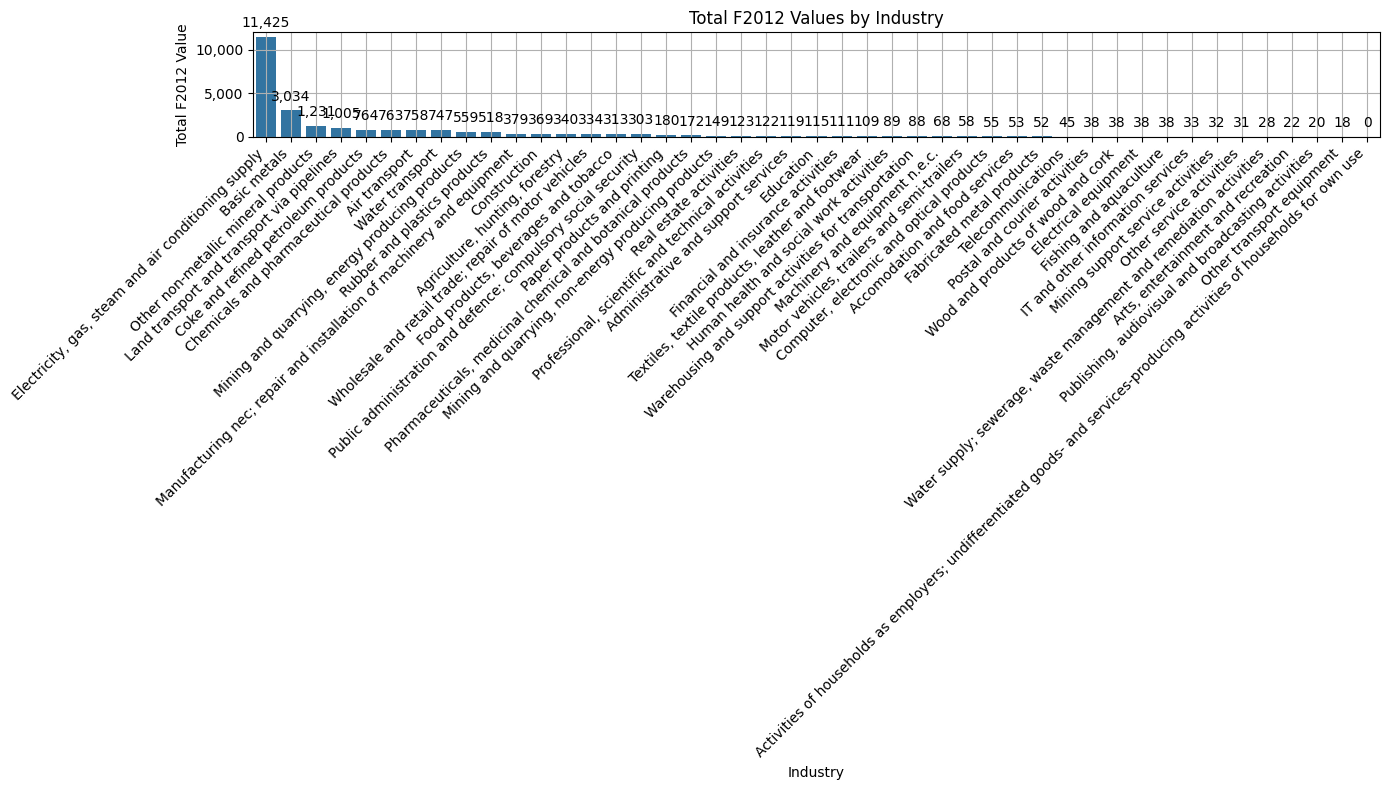

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

unique_industries = df_cleaned['Industry'].unique()
summed_values = []


for industry in unique_industries:
    
    filtered_df = df_cleaned[df_cleaned['Industry'] == industry]
    
    total_f2012 = filtered_df['F2012'].sum()
    

    summed_values.append({'Industry': industry, 'Total_F2012': total_f2012})


summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_F2012', ascending=False)

print(summed_values_df)

plt.figure(figsize=(14, 8))  
bar_plot = sns.barplot(x='Industry', y='Total_F2012', data=summed_values_df)
plt.title('Total F2012 Values by Industry')
plt.xlabel('Industry')
plt.ylabel('Total F2012 Value')

plt.xticks(rotation=45, ha='right')
plt.grid()

def format_y_values(value, tick_number):
    return f'{int(value):,}'  

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout() 
plt.show()


Top 10 industries who are producing CO2 in 2012

                                             Industry  Total_F2012
40  Electricity, gas, steam and air conditioning s...    11425.652
14                                       Basic metals     3034.107
4                 Other non-metallic mineral products     1231.321
11         Land transport and transport via pipelines     1005.299
44                Coke and refined petroleum products      764.358
9               Chemicals and pharmaceutical products      763.772
5                                       Air transport      758.263
15                                    Water transport      747.607
34    Mining and quarrying, energy producing products      559.733
3                        Rubber and plastics products      518.018


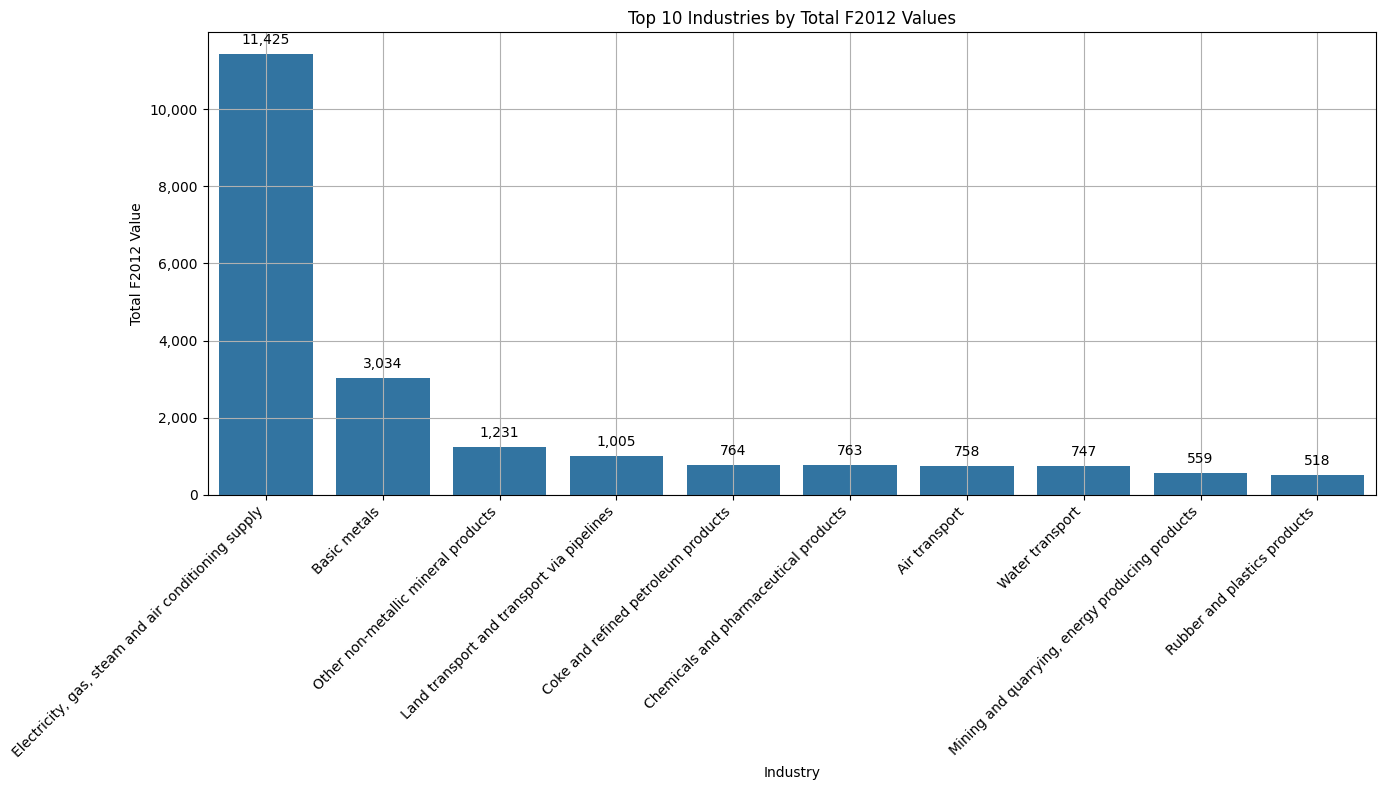

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

unique_industries = df_cleaned['Industry'].unique()

summed_values = []

for industry in unique_industries:

    filtered_df = df_cleaned[df_cleaned['Industry'] == industry]
    
    total_f2012 = filtered_df['F2012'].sum()
    
   
    summed_values.append({'Industry': industry, 'Total_F2012': total_f2012})


summed_values_df = pd.DataFrame(summed_values)
summed_values_df = summed_values_df.sort_values(by='Total_F2012', ascending=False)

top_10_industries_df = summed_values_df.head(10)


print(top_10_industries_df)

plt.figure(figsize=(14, 8)) 
bar_plot = sns.barplot(x='Industry', y='Total_F2012', data=top_10_industries_df)
plt.title('Top 10 Industries by Total F2012 Values')
plt.xlabel('Industry')
plt.ylabel('Total F2012 Value')

plt.xticks(rotation=45, ha='right')
plt.grid()

def format_y_values(value, tick_number):
    return f'{int(value):,}'  

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()  
plt.show()


                                             Industry     F1995     F1996  \
40  Electricity, gas, steam and air conditioning s...  6860.231  7175.105   
14                                       Basic metals  1524.871  1462.117   
44                Coke and refined petroleum products   729.301   715.525   
4                 Other non-metallic mineral products   671.963   666.864   
11         Land transport and transport via pipelines   641.442   667.933   
5                                       Air transport   554.145   581.189   
15                                    Water transport   497.540   536.605   
9               Chemicals and pharmaceutical products   523.481   528.415   
34    Mining and quarrying, energy producing products   360.873   372.148   
6                      Agriculture, hunting, forestry   335.826   328.766   

       F1997     F1998     F1999     F2000     F2001  Total_Sum  
40  7352.718  7531.278  7584.040  8061.300  8233.972  52798.644  
14  1477.352  1471.5

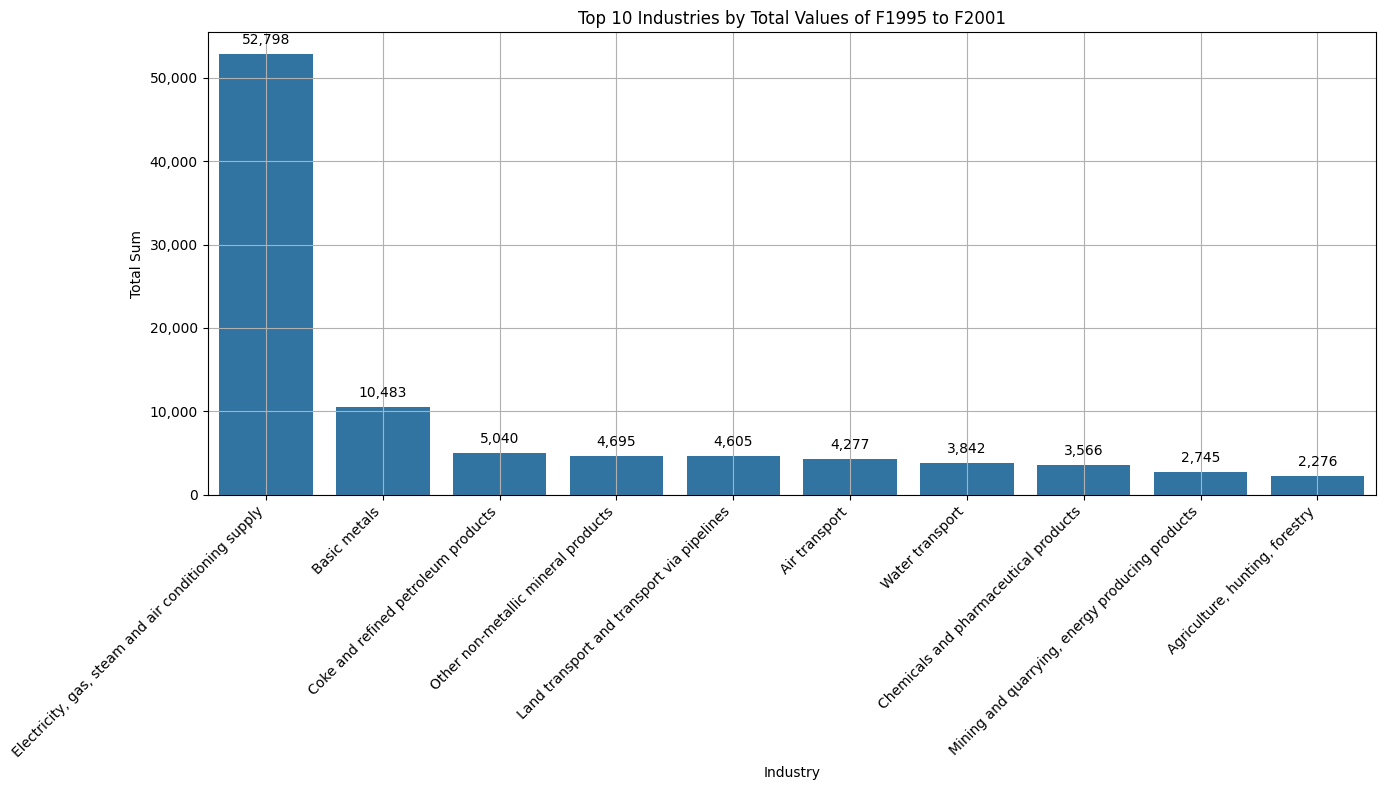

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

columns_to_sum = ['F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001']

unique_industries = df_cleaned['Industry'].unique()

summed_values = []

for industry in unique_industries:
    
    filtered_df = df_cleaned[df_cleaned['Industry'] == industry]
    
    total_values = filtered_df[columns_to_sum].sum()
    
    summed_values.append({'Industry': industry, **total_values})


summed_values_df = pd.DataFrame(summed_values)
summed_values_df['Total_Sum'] = summed_values_df[columns_to_sum].sum(axis=1)


summed_values_df = summed_values_df.sort_values(by='Total_Sum', ascending=False)

top_10_industries_df = summed_values_df.head(10)

print(top_10_industries_df)

plt.figure(figsize=(14, 8)) 
bar_plot = sns.barplot(x='Industry', y='Total_Sum', data=top_10_industries_df)
plt.title('Top 10 Industries by Total Values of F1995 to F2001')
plt.xlabel('Industry')
plt.ylabel('Total Sum')

plt.xticks(rotation=45, ha='right')
plt.grid()

def format_y_values(value, tick_number):
    return f'{int(value):,}'  

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))

for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()  
plt.show()


Top 10 CO2 emitting Industries from 1995 to 2018

                                             Industry     F1995     F1996  \
12                Administrative and support services    79.856    87.698   
5                                       Air transport   554.145   581.189   
40  Electricity, gas, steam and air conditioning s...  6860.231  7175.105   
14                                       Basic metals  1524.871  1462.117   
4                 Other non-metallic mineral products   671.963   666.864   
11         Land transport and transport via pipelines   641.442   667.933   
44                Coke and refined petroleum products   729.301   715.525   
15                                    Water transport   497.540   536.605   
9               Chemicals and pharmaceutical products   523.481   528.415   
34    Mining and quarrying, energy producing products   360.873   372.148   

       F1997     F1998     F1999     F2000     F2001     F2002     F2004  ...  \
12    87.529    83.824    85.888    90.081    88.306    93.625    93.57

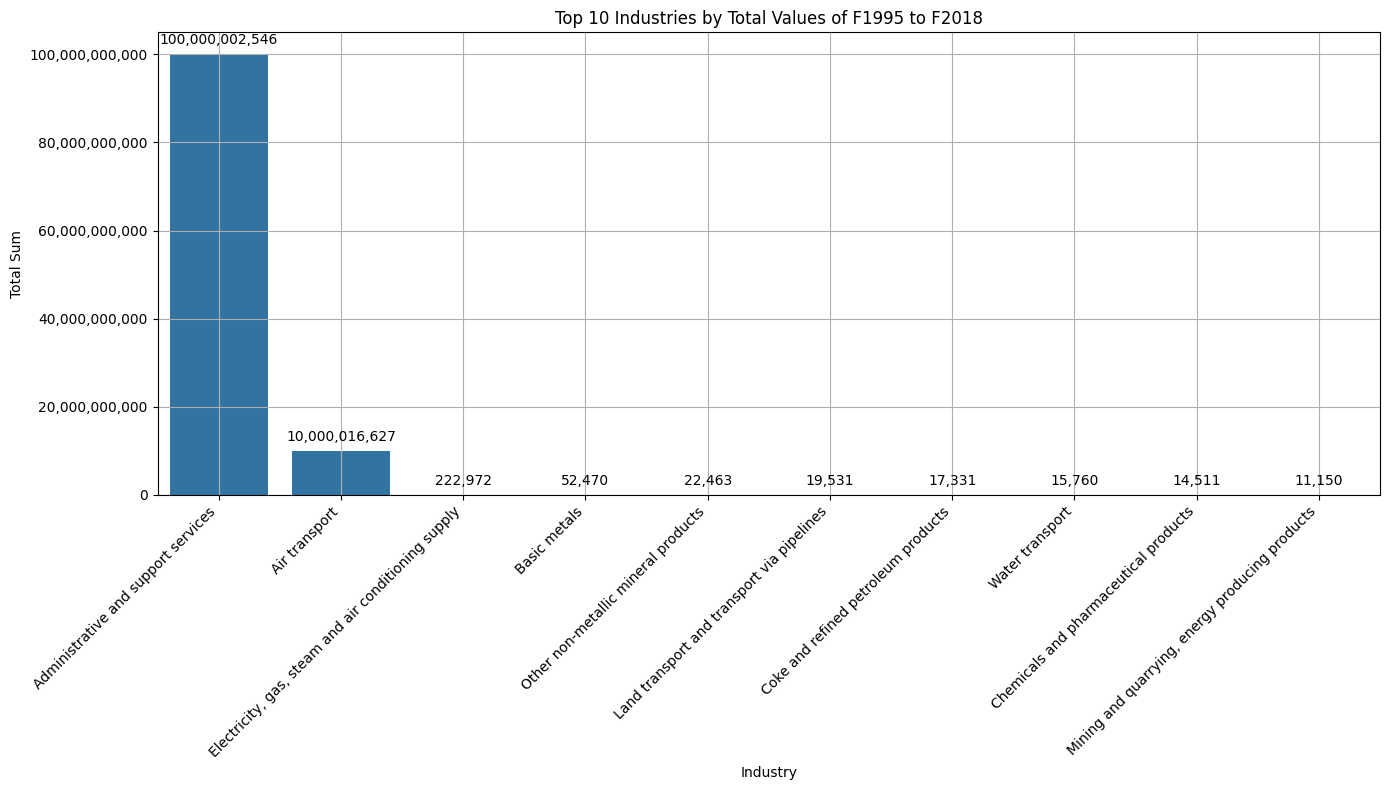

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

columns_to_sum = ['F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 
                  'F2001', 'F2002', 'F2004', 'F2005', 'F2006', 'F2007', 
                  'F2008', 'F2009', 'F2010', 'F2011', 'F2012', 'F2013', 
                  'F2014', 'F2015', 'F2016', 'F2017', 'F2018']


unique_industries = df_cleaned['Industry'].unique()
summed_values = []


for industry in unique_industries:
    
    filtered_df = df_cleaned[df_cleaned['Industry'] == industry]
    total_values = filtered_df[columns_to_sum].sum()
    summed_values.append({'Industry': industry, **total_values})
summed_values_df = pd.DataFrame(summed_values)
summed_values_df['Total_Sum'] = summed_values_df[columns_to_sum].sum(axis=1)
summed_values_df = summed_values_df.sort_values(by='Total_Sum', ascending=False)
top_10_industries_df = summed_values_df.head(10)
print(top_10_industries_df)
plt.figure(figsize=(14, 8))  # Increase figure size for better spacing
bar_plot = sns.barplot(x='Industry', y='Total_Sum', data=top_10_industries_df)
plt.title('Top 10 Industries by Total Values of F1995 to F2018')
plt.xlabel('Industry')
plt.ylabel('Total Sum')


plt.xticks(rotation=45, ha='right')
plt.grid()


def format_y_values(value, tick_number):
    return f'{int(value):,}'  # Format as integers with commas


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_values))


for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout() 
plt.show()


Now we are exporting our cleaned file in csv format

In [45]:
df_cleaned.to_csv('Cleaned_data.csv', index=False)